In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from src.data_science.data import split_data
from sklearn.metrics import r2_score
from src.data_processing.load_data import load_data

# Features 

* Price: The price of the house.

* Area: The total area of the house in square feet.

* Bedrooms: The number of bedrooms in the house.

* Bathrooms: The number of bathrooms in the house.

* Stories: The number of stories in the house.

* Mainroad: Whether the house is connected to the main road (Yes/No).

* Guestroom: Whether the house has a guest room (Yes/No).

* Basement: Whether the house has a basement (Yes/No).

* Hot water heating: Whether the house has a hot water heating system (Yes/No).

* Airconditioning: Whether the house has an air conditioning system (Yes/No).

* Parking: The number of parking spaces available within the house.

* Prefarea: Whether the house is located in a preferred area (Yes/No).

* Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

* House Age: the house age

# 1 Exploration des données (EDA)

## 1.1 Importation des données

In [6]:
# Importating the data
df = load_data('data/house_prices.csv')
df.head()

,price,AreA,bedrooms,BATHROOMS,stories,mainroad,guestroom,basement,hotwaterheating,air conditioning,parking,prefarea,furnishing STATUS,houSeaGe
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,FURNISHED,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,FURNISHED,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


## 1.2 Nettoyage des données

### 1.2.1 Formatage des données

In [10]:
def formatage_donnee(data):
    """
    Description:
    This function changes column names to lowercase and replaces spaces with underscores. It makes unique values that are written differently.

    Parameters:
    data: A DataFrame

    Returns:
    A cleaned DataFrame
    """
    # Writing the columns names in lowercase, and replacing any space in the names with _
    data = data.rename(columns=lambda x: x.lower().replace(' ', '_'))
    
    # Making unique values that have been written diffrentely 
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].str.lower()
    
            
    return data   

df = formatage_donnee(df)             

In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status,houseage
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2653000.0,4000.0,3.0,1.0,2.0,yes,no,no,no,yes,0.0,no,unfurnished,NaN
805,8855000.0,6421.0,3.0,3.0,2.0,yes,no,no,no,yes,1.0,yes,semi-furnished,NaN
806,3010000.0,3750.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
807,4340000.0,1905.0,5.0,1.0,2.0,no,no,yes,no,no,0.0,no,semi-furnished,NaN


### 1.2.2 Valeurs manquantes


In [12]:
# Displaying the number of missing values
df.isnull().sum(axis = 0) 

price                 20
area                  15
bedrooms              24
bathrooms             21
stories               15
mainroad              16
guestroom             23
basement              22
hotwaterheating       18
air_conditioning      15
parking               16
prefarea              14
furnishing_status     23
houseage             804
dtype: int64

In [13]:
# We notice that houseage column has 804 missing value out of 806, so we remove this column
df = df.drop('houseage', axis=1)

In [15]:
# Removing missing values for the 'price' column
df.dropna(subset=['price'], inplace=True)

In [17]:
# Displaying the number of missing values for each column
df.isnull().sum()

price                 0
area                 13
bedrooms             21
bathrooms            19
stories              15
mainroad             14
guestroom            20
basement             21
hotwaterheating      17
air_conditioning     13
parking              16
prefarea             13
furnishing_status    20
dtype: int64

## 1.3 Visualisation des données

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished


### 1.3.1 Etude univariée

In [19]:
def etude_univarie(data):
    """
    Description:
    This function displays the distribution of each variable.
    
    Parameters:
    data: A DataFrame
    
    Returns:
    Graphical figures
    """
    colonne_quanti = data.select_dtypes("float").columns
    colonne_quali = data.select_dtypes("object").columns
    
    fig, axes = plt.subplots(nrows=3, ncols=len(colonne_quanti), figsize=(15, 6))

    # Parcourez chaque colonne quantitative et affichez son histogramme
    for i, col in enumerate(colonne_quanti):
        sns.histplot(data[col].to_numpy(), kde=True, ax=axes[0, i], color="blue", bins=30)
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Fréquence')
    
    # Parcourez chaque colonne qualitative et affichez un diagramme en secteurs (pie chart)
    for i, col in enumerate(colonne_quali):
        counts = data[col].value_counts()
        if i < len(colonne_quali) and i < 6:
            row = 1
        else:
            row = 2
            i -= 6  # Réduisez l'indice pour accéder correctement aux colonnes qualitatives dans la deuxième ligne
        axes[row, i].pie(counts, labels=counts.index, autopct='%1.1f%%')
        axes[row, i].set_xlabel(col)
        axes[row, i].set_ylabel('')
    for i in range(1,6):
        axes[2,i].axis('off')    

    # Ajustez la mise en page pour éviter les chevauchements d'étiquettes
    plt.tight_layout()
    # Affichez la figure
    fig.suptitle("Figure Title")
    plt.show()
    

   

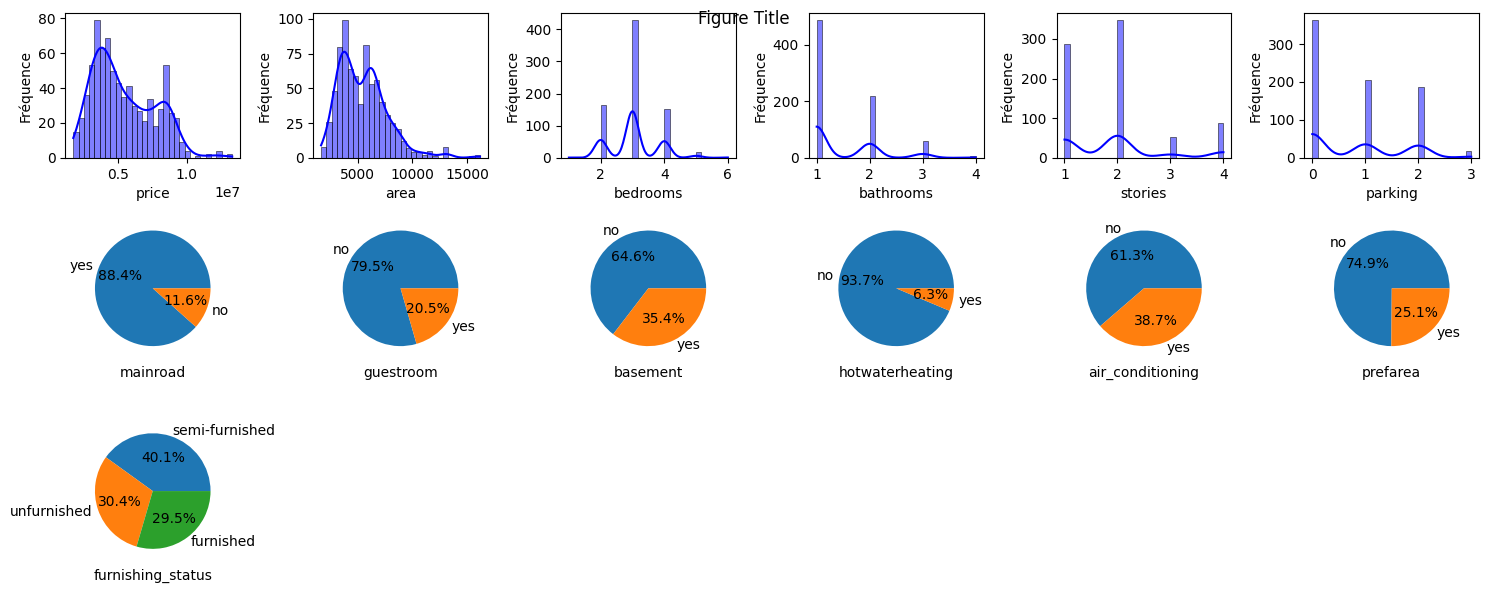

In [20]:
etude_univarie(df)

### 1.3.2 Etude multivariée

In [24]:
def etude_multivarie(data):
    """
    Description:
    This function displays the correlation matrix between quantitative variables and the data distribution between two variables.
    
    Parameters:
    data: pandas.DataFrame.
    
    Returns:
    None.
    """
    colonne_quanti = data.select_dtypes("float").columns
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))
    axes_flat = axes.flatten()
    # Iterate through each quantitative column and display its relationship with the price 
    for i, col in enumerate(colonne_quanti):
        if col != 'price':
            if col == 'area':
                sns.regplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[i-1])
                axes_flat[i-1].set_xlabel(col)
                axes_flat[i-1].set_ylabel('Price')
            else:    
                sns.histplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[i-1], cmap='coolwarm',cbar=True)
                axes_flat[i-1].set_xlabel(col)
                axes_flat[i-1].set_ylabel('Price')
            
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax = axes_flat[5])   

    colonne_quali = data.select_dtypes('object').columns
    for i, col in enumerate(colonne_quali):
        sns.histplot(x=col, y='price', data=df, line_kws={"color": 'red'}, ax=axes_flat[5+i], cmap='coolwarm',cbar=True)
        axes_flat[5+i].set_xlabel(col)
        axes_flat[5+i].set_ylabel('Price')     
    
    
    plt.tight_layout()
    # Display the figure
    plt.show()

C:\Users\BIBER\AppData\Local\Temp\ipykernel_22752\1756180861.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax = axes_flat[5])


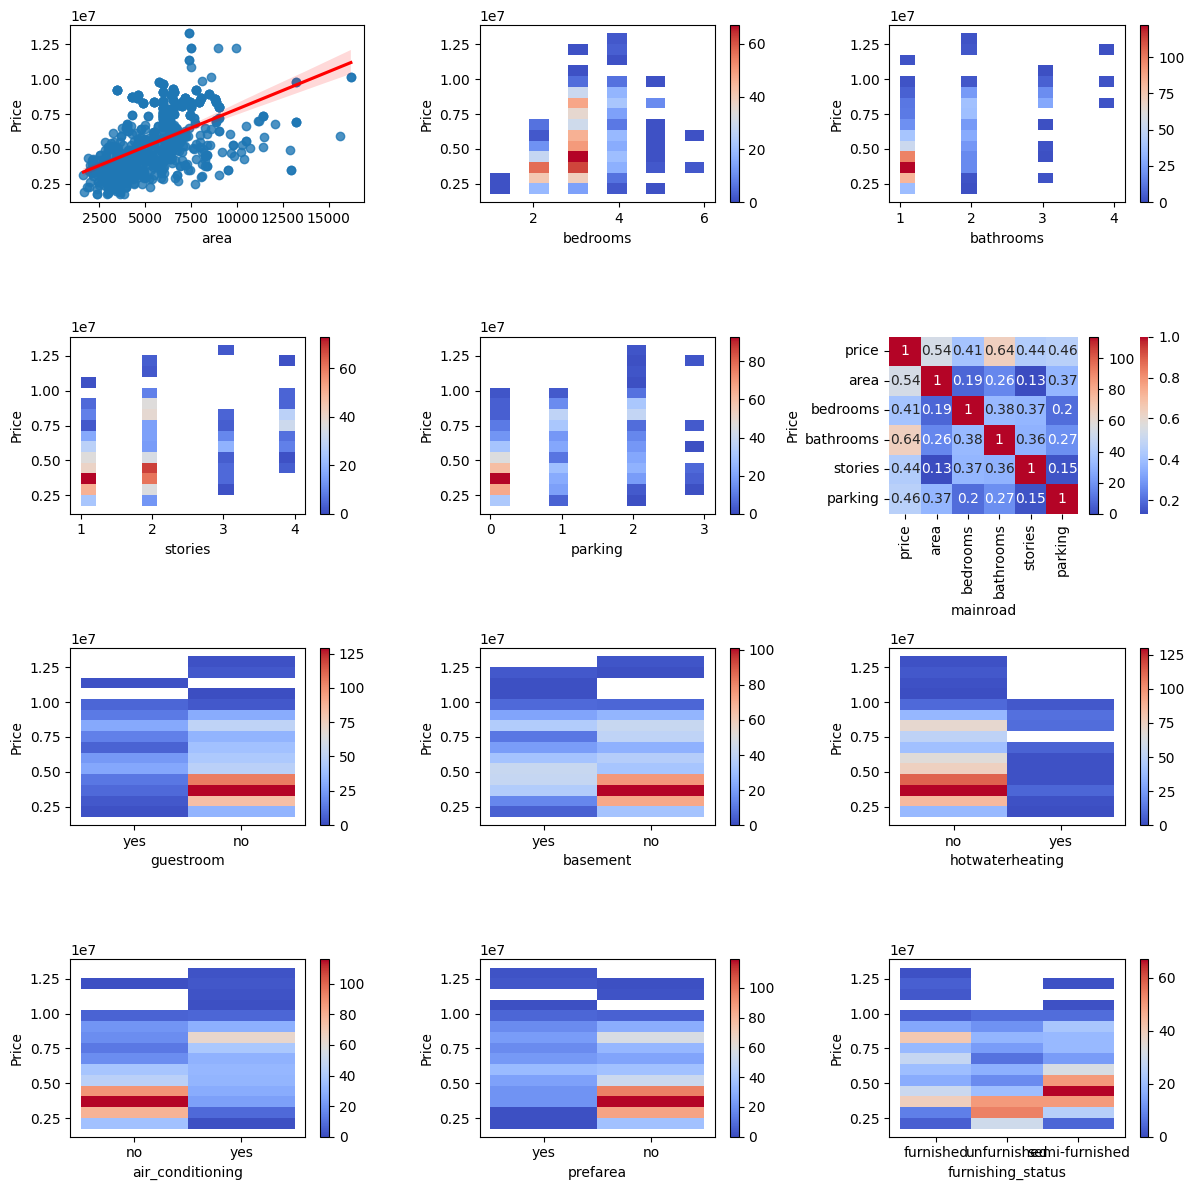

In [26]:
etude_multivarie(df)

## Valeur manquante

In [27]:
def handle_missing_values(data):
    """
    Description:
    This function handles missing values in a dataset by replacing them with appropriate central tendency measures
    (median for quantitative variables and mode for qualitative variables).

    Parameters:
    data: A pandas DataFrame containing the dataset with missing values.

    Returns:
    A pandas DataFrame with missing values replaced by the median for quantitative variables and the mode for qualitative variables.
    """
    # Separate quantitative variables from qualitative variables
    quantitative_columns = data.select_dtypes(include=['int', 'float']).columns
    qualitative_columns = data.select_dtypes(include=['object']).columns

    # Calculate the median for each quantitative variable
    medians = data[quantitative_columns].median()

    # Calculate the mode for each qualitative variable
    modes = data[qualitative_columns].mode().iloc[0]

    # Replace missing values in quantitative variables with their respective medians
    data[quantitative_columns] = data[quantitative_columns].fillna(medians)

    # Replace missing values in qualitative variables with their respective modes
    data[qualitative_columns] = data[qualitative_columns].fillna(modes)
    
    return data


In [28]:
df = handle_missing_values(df)

In [30]:
# Checking for any remaining missing values
df.isnull().sum()

price                0
area                 0
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
air_conditioning     0
parking              0
prefarea             0
furnishing_status    0
dtype: int64

### 1.4 Typage des variables

In [31]:
def variable_typing(data):
    """
    Description:
    We change the values 'yes, no' to '1,0' respectively.
    We encode the categorical variables.
    We change the values True and False in our data to 1 and 0 respectively.
    We replace 'semi-furnished' with 'semi_furnished'.

    Args:
    data: pandas.DataFrame.

    Returns:
    df: pandas.DataFrame.
    """
    # Create a variable that contains the names of object-type columns
    object_columns = data.select_dtypes(include=['object']).columns

    # Change the values 'yes' and 'no' in our data to 1 and 0 respectively
    for col in object_columns:
        data[col] = data[col].replace({'yes': 1, 'no': 0, 'semi-furnished': 'semi_furnished'})

    # Perform one-hot encoding
    one_hot = data.select_dtypes(include=['object']).columns
    data = pd.get_dummies(data, columns=one_hot)
    
    # Change boolean values to 1 and 0
    boolean_columns = data.select_dtypes(include=['bool']).columns
    data[boolean_columns] = data[boolean_columns].astype(int)
    
    return data


In [32]:
df = variable_typing(df)

In [33]:
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status_furnished,furnishing_status_semi_furnished,furnishing_status_unfurnished
0,4543000.0,4990.0,4.0,2.0,2.0,1,1,1,0,0,0.0,1,1,0,0
1,8080940.0,7000.0,3.0,2.0,4.0,1,0,0,0,1,2.0,0,1,0,0
2,8750000.0,4321.0,3.0,2.0,2.0,1,0,1,1,0,2.0,0,1,0,0
3,1890000.0,1700.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,0,0,1
4,12215000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2653000.0,4000.0,3.0,1.0,2.0,1,0,0,0,1,0.0,0,0,0,1
805,8855000.0,6421.0,3.0,3.0,2.0,1,0,0,0,1,1.0,1,0,1,0
806,3010000.0,3750.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,0,0,1
807,4340000.0,1905.0,5.0,1.0,2.0,0,0,1,0,0,0.0,0,0,1,0


# 2 Validation croisée

# 3 Machine learning

## 3.1 Baseline

In [34]:
X_train, y_train, X_test, y_test = split_data(df)

# Create a list to store predictions from the baseline model
predictions = []

# Loop to predict prices using the mean of the number of bedrooms
for i in range(int(df['bedrooms'].min()), int(df['bedrooms'].max()) + 1):
    mean_price = y_train[X_train['bedrooms'] == i].mean()
    print(f"A house with {i} bedrooms costs {mean_price} euros")
    predictions.append(mean_price)

# Create a NumPy array with the first column as predictions and the second column as the true values
concatenated_data = np.concatenate((X_test[['bedrooms']], y_test), axis=1)
for i in range(len(concatenated_data)):
    index = int(concatenated_data[i, 0])
    concatenated_data[i, 0] = predictions[index - 1]

y_pred = concatenated_data[:, 0]
y_test = concatenated_data[:, 1]

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the Mean Absolute Error
mean_absolute_err = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mean_absolute_err)

# Calculate the Coefficient of Determination (R-squared)
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r_squared)


A house with 1 bedrooms costs price    2712500.0
dtype: float64 euros
A house with 2 bedrooms costs price    3.607145e+06
dtype: float64 euros
A house with 3 bedrooms costs price    5.592092e+06
dtype: float64 euros
A house with 4 bedrooms costs price    6428450.0
dtype: float64 euros
A house with 5 bedrooms costs price    7391125.0
dtype: float64 euros
A house with 6 bedrooms costs price    4361000.0
dtype: float64 euros
Mean Absolute Error: 1586862.1334976312
Coefficient of Determination (R-squared): 0.192125462158384


## 3.2 Modèle de régression linéaire

## 3.3 Ensemble Model

In [22]:
# Splitting the data into training and testing sets

# We begin by importing the split_data function that we defined.
from src.data_science.data import split_data

# We take 80% as train and 20% as test with a random seed of 7.
X_train, y_train, X_test, y_test = split_data(df, 0.2, 7)

# We convert the DataFrames y_train and y_test to NumPy arrays.
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Random Forest

### Gradient Boosting
In this part we use Gradient boosting model, which consists of training multiple decision trees $m_1, m_2, \cdots, m_k$, which we call weak learner, then we train them sequentialy, in a way that each weak learner $m_{i+1}$ corrects the errors of $m_i$.

In [23]:
# We start by uploading the Gradient Boosting Regressor from sckitlearn.
from sklearn.ensemble import GradientBoostingRegressor

# n_esmitators is the number of week learner we are considering, and max_depth parameter represent the depth of each tree m_i.
gra_boost_model = GradientBoostingRegressor(n_estimators= 100, max_depth=3)

# We train the model
gra_boost_model.fit(X_train,y_train.ravel())

# We print the score of the model on train and test set
print(f' The score on the train set is {gra_boost_model.score(X_train,y_train)}, and the score in test set is {gra_boost_model.score(X_test,y_test)}')


 The score on the train set is 0.8969644401699818, and the score in test set is 0.7660143342356801


 #### Determining the best number of estimators
 In this part we see the performance of the model when we change the number of the trees we are using (n_estimators).

In [24]:
# We import the mean absolute error from sklearn.
from sklearn.metrics import mean_absolute_error

# We create two empty lists: one for the scores on the training set and one for the scores on the test set.
score_train, score_test = [], []

for i in range(1, 150):
    gra_boost_model = GradientBoostingRegressor(n_estimators=i).fit(X_train, y_train.ravel())
    score_train.append(mean_absolute_error(y_train, gra_boost_model.predict(X_train)))
    score_test.append(mean_absolute_error(y_test, gra_boost_model.predict(X_test)))

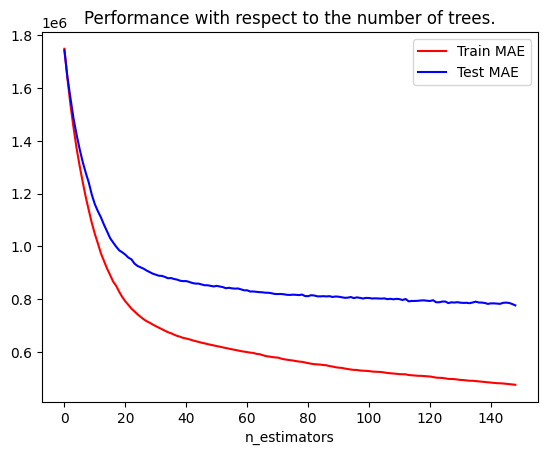

In [25]:
# Plot the training and test scores
plt.plot(score_train, color='red', label='Train MAE')
plt.plot(score_test, color='blue', label='Test MAE')

# Label the axes and set the title
plt.xlabel('n_estimators')
plt.ylabel('')
plt.title('Performance with respect to the number of trees.')

# Display the legend and the plot
plt.legend()
plt.show()

We notice that the model improves when we increase the number of estimators.

### Determining the best depth of the trees.

In [26]:
# We do the some for the depth of the tree, and fix the n_estimators to 100.
score_train_d ,score_test_d = [], []

for i in range(1,16):
    gra_boost_model = GradientBoostingRegressor(n_estimators= 100, max_depth= i).fit(X_train,y_train.ravel())
    score_train_d.append(mean_absolute_error(y_train, gra_boost_model.predict(X_train)))
    score_test_d.append(mean_absolute_error(y_test, gra_boost_model.predict(X_test)))

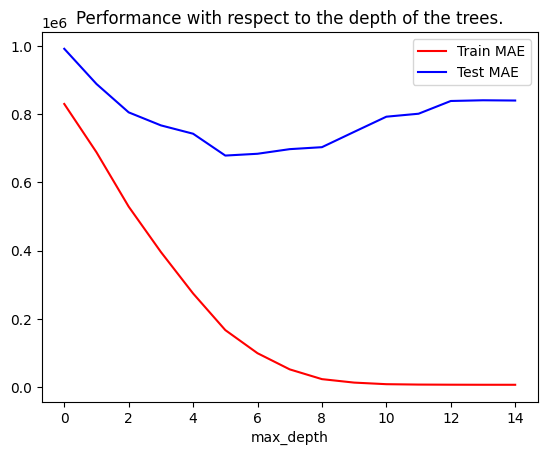

In [27]:
# Plot the training and test scores
plt.plot(score_train_d, c='r', label='Train MAE')   
plt.plot(score_test_d,c='blue', label = 'Test MAE')

# Label the axes and set the title
plt.xlabel('max_depth')
plt.ylabel('')
plt.title('Performance with respect to the depth of the trees.')

# Display the legend and the plot
plt.legend()
plt.show()

We notice that if we use depth bigger than 7, the model will overfit.

## 3.4 Features importances

# 4 Bonus

#### GridSearchCV for the Gradient Boosting model.
We describe briefly what is GridSearchCV. It is an algorithm that search for the best parameters of a certain model. First we provide the parameters (a dictionnary) we want to test, and the number of cross validations denoted by cv (an integer). It starts by deviding the training set $X_{train}$ into k equal subsets $P_1,\cdots,P_k$, then it fits the model on $\bigcup\limits_{i\neq i_0}P_i$, and gets the score on $P_{i_0}$, for $i_0=1,\cdots,k$.  

In [28]:
# We begin by importing the GridSearchCV
from sklearn.model_selection import GridSearchCV

# We choose the model we want to determine it best parameters.
gra_boost_model = GradientBoostingRegressor()

# We specify the parameters that we want GridSearchCV to use when tuning the model.
parameters = {
    'n_estimators':[i for i in range(1,100)], 
    'max_depth':[i for i in range(1,5)]
}

# Create a GridSearchCV object to search for the best hyperparameters
clf = GridSearchCV(gra_boost_model, parameters, cv=5)

# Fit the model to the training data
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [29]:
# to get the best parameters we use the following method
clf.best_params_

{'max_depth': 4, 'n_estimators': 74}

#### RandomizedSearchCV for the Gradient Boosting model
RandomizedSearchCV is a method for finding the best hyperparameters for machine learning models by randomly sampling parameter combinations. It's efficient for large search spaces and allows you to control the number of iterations for the search.

In [30]:
# We begin by importing the RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# We choose the model we want to determine its best parameters.
gra_boost_model = GradientBoostingRegressor()

# We specify the parameters and their distributions for RandomizedSearchCV.
param_dist = {
    'n_estimators': [i for i in range(1, 150)],
    'max_depth': [i for i in range(1, 10)]
}

# Create a RandomizedSearchCV object to search for the best hyperparameters.
clf_random = RandomizedSearchCV(gra_boost_model, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the model to the training data.
clf_random.fit(X_train, y_train.ravel())


KeyboardInterrupt: 

In [ ]:
clf_random.best_params_

{'n_estimators': 108, 'max_depth': 4}